# Trading Lists and Trading Trajectories

### Introduction

Almgren and Chriss provided a solution to the optimal liquidation problem by assuming the that stock prices follow a discrete arithmetic random walk, and that the permanent and temporary market impact functions are linear functions of the trading rate.

Almgren and Chriss showed that for each value of risk aversion there is a unique optimal execution strategy. This optimal execution strategy is determined by a trading trajectory and its associated trading list. The optimal trading trajectory is given by:

\begin{equation}
x_j = \frac{\sinh \left( \kappa \left( T-t_j\right)\right)}{ \sinh (\kappa T)}X, \hspace{1cm}\text{ for } j=0,...,N
\end{equation}

and the associated trading list is given by:

\begin{equation}
n_j = \frac{2 \sinh \left(\frac{1}{2} \kappa \tau \right)}{ \sinh \left(\kappa T\right) } \cosh \left(\kappa \left(T - t_{j-\frac{1}{2}}\right)\right) X, \hspace{1cm}\text{ for } j=1,...,N
\end{equation}

where $t_{j-1/2} = (j-\frac{1}{2}) \tau$.

Given some initial parameters, such as the number of shares, the liquidation time, the trader's risk aversion, etc..., the trading list will tell us how many shares we should sell at each trade to minimize our transaction costs. 

In this notebook, we will see how the trading list varies according to some initial trading parameters. 

## Visualizing Trading Lists and Trading Trajectories

Let's assume we have 1,000,000 shares that we wish to liquidate. In the code below, we will plot the optimal trading trajectory and its associated trading list for different trading parameters, such as trader's risk aversion, number of trades, and liquidation time. 

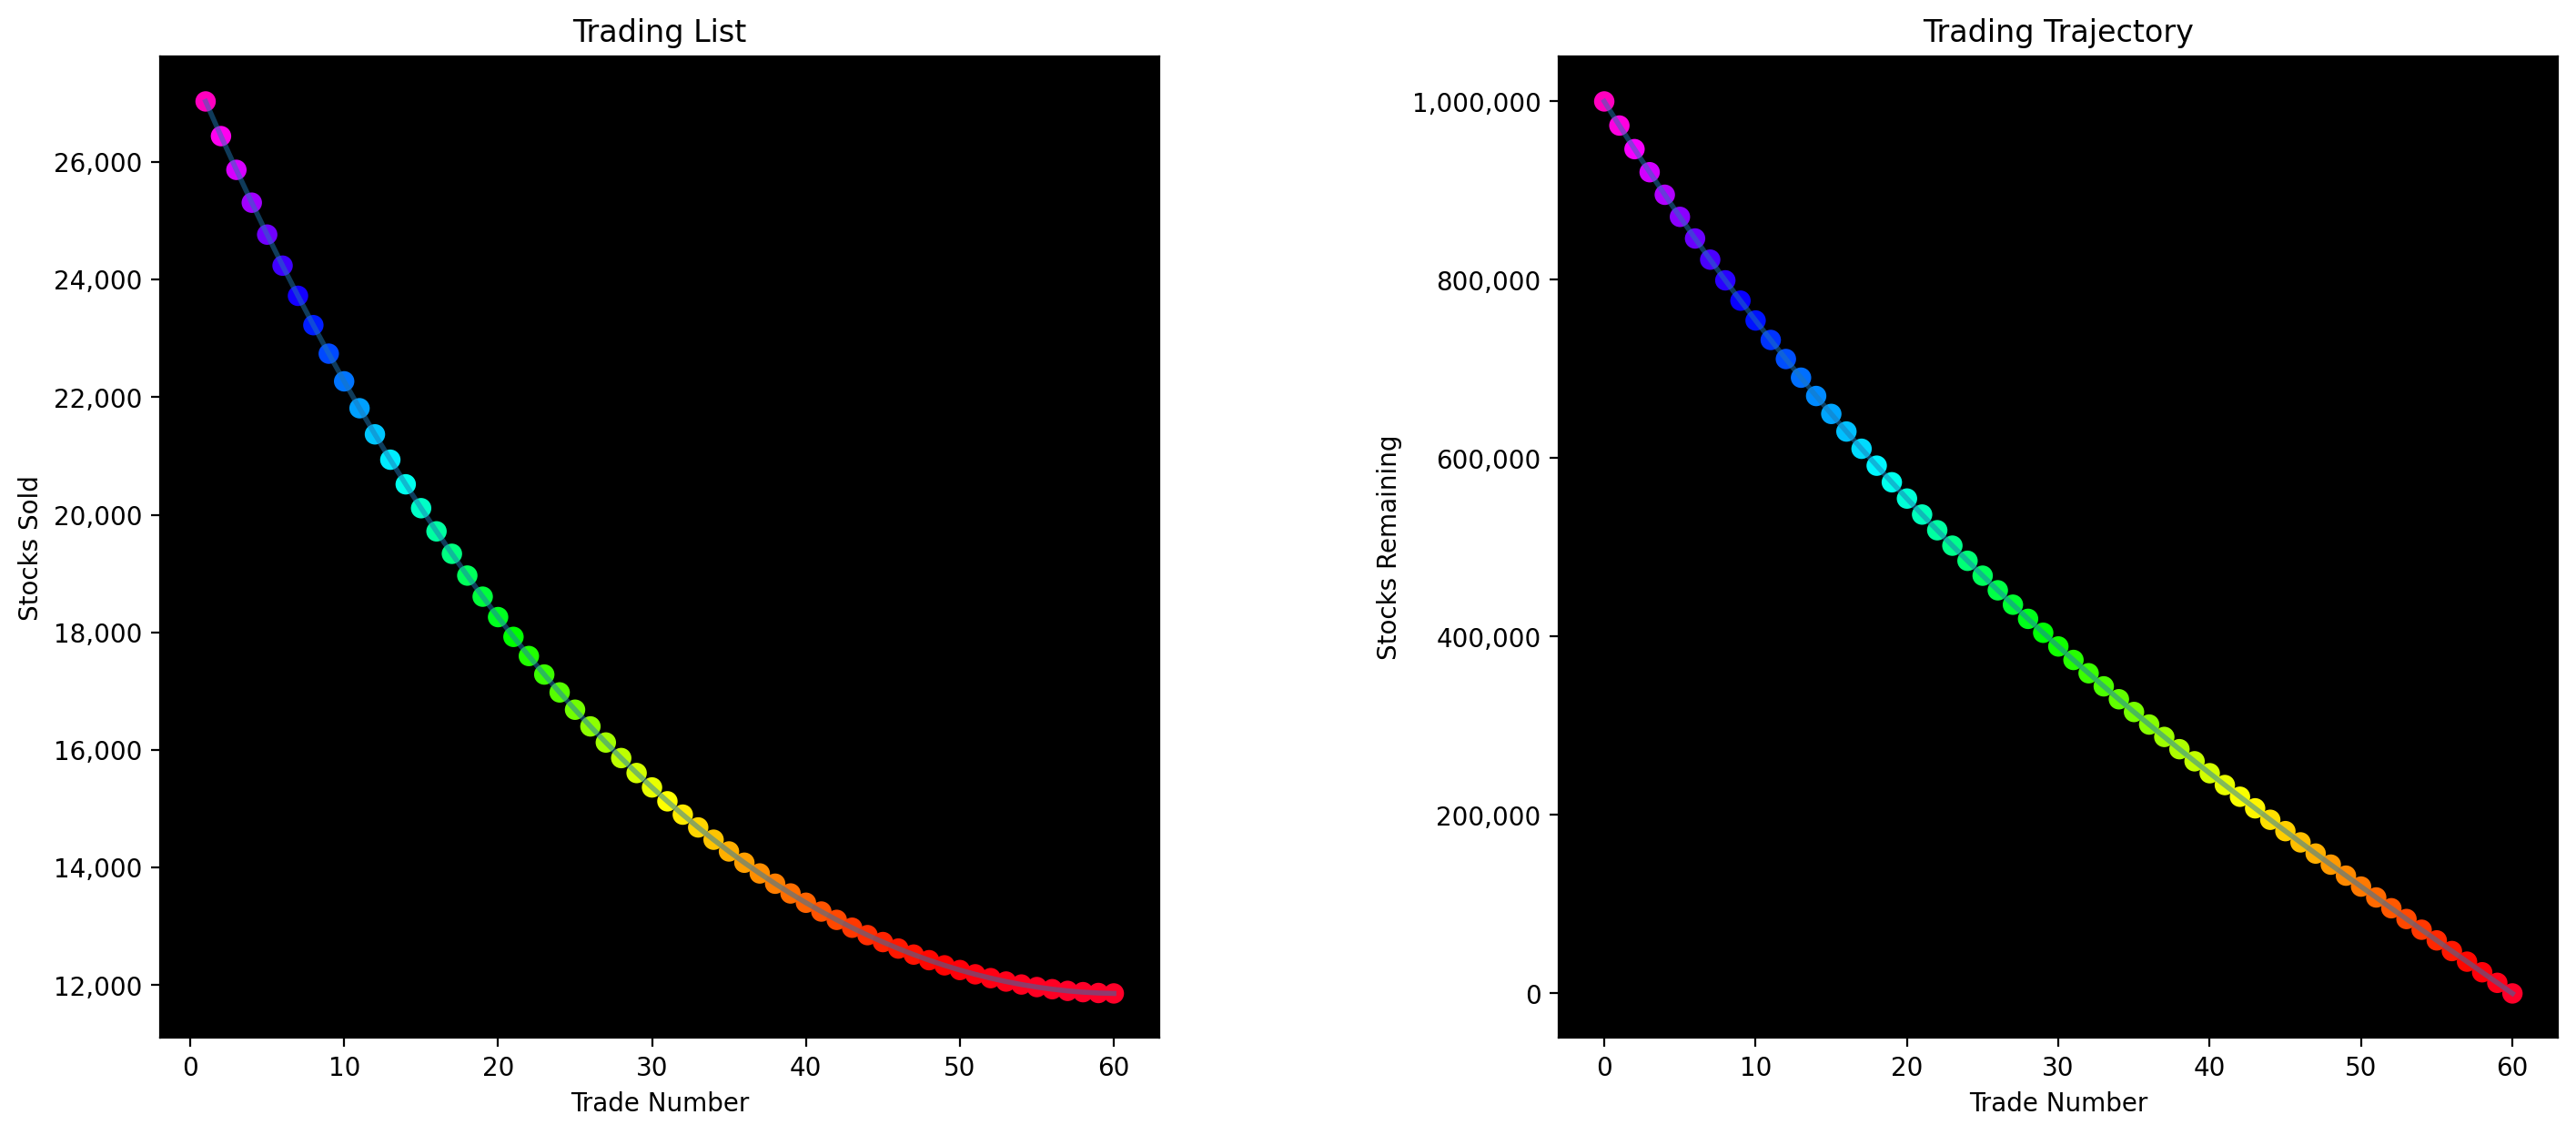


Number of Shares Sold: 1,000,000



Trade Number,Stocks Sold,Stocks Remaining
0,0,"1,000,000"
1,"27,029","972,971"
2,"26,439","946,532"
3,"25,865","920,667"
4,"25,307","895,360"
5,"24,764","870,596"
6,"24,236","846,360"
7,"23,723","822,637"
8,"23,224","799,413"
9,"22,739","776,674"


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

# Add-on : Hide Matplotlib deprecate warnings
import warnings
warnings.filterwarnings("ignore")
# High resolution plot outputs for retina display
%config InlineBackend.figure_format = 'retina'

import utils

# We set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]


# Set the number of days to sell all shares (i.e. the liquidation time)
l_time = 60

# Set the number of trades
n_trades = 60

# Set the trader's risk aversion
t_risk = 1e-8

# Plot the trading list and trading trajectory. If show_trl = True, the data frame containing the values of the
# trading list and trading trajectory is printed
utils.plot_trade_list(lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk, show_trl = True)

# Implementing a Trading List

Once we have the trading list for a given set of initial parameters, we can actually implement it. That is, we can sell our shares in the stock market according to the trading list and see how much money we made or lost. To do this, we are going to simulate the stock market with a simple trading environment. This simulated trading environment uses the same price dynamics and market impact functions as the Almgren and Chriss model. That is, stock price movements evolve according to a discrete arithmetic random walk and the permanent and temporary market impact functions are linear functions of the trading rate. We are going to use the same environment to train our Deep Reinforcement Learning algorithm later on.

We will describe the details of the trading environment in another notebook, for now we will just take a look at its default parameters. We will distinguish between financial parameters, such the annual volatility in stock price, and the parameters needed to calculate the trade list using the Almgren and Criss model, such as the trader's risk aversion.

In [4]:
import utils

# Get the default financial and AC Model parameters
financial_params, ac_params = utils.get_env_param()

### Default Financial Parameters

In [5]:
financial_params

Annual Volatility:,12%,Bid-Ask Spread:,0.125
Daily Volatility:,0.8%,Daily Trading Volume:,"5,000,000"


### Parameters for the Almgren and Chriss Model

In [6]:
ac_params

Total Number of Shares to Sell:,"1,000,000",Fixed Cost of Selling per Share:,$0.062
Starting Price per Share:,$50.00,Trader's Risk Aversion:,1e-06
Price Impact for Each 1% of Daily Volume Traded:,$2.5e-06,Permanent Impact Constant:,2.5e-07
Number of Days to Sell All the Shares:,60,Single Step Variance:,0.144
Number of Trades:,60,Time Interval between trades:,1.0


The code below implements the trading list resulting from different trading parameters, such as trader's risk aversion, number of trades, and liquidation time. All other parameters, such as total number shares to sell, are taken from the simulated trading environment (see above). 

Implementation Shortfall: $-1,036,949.72 



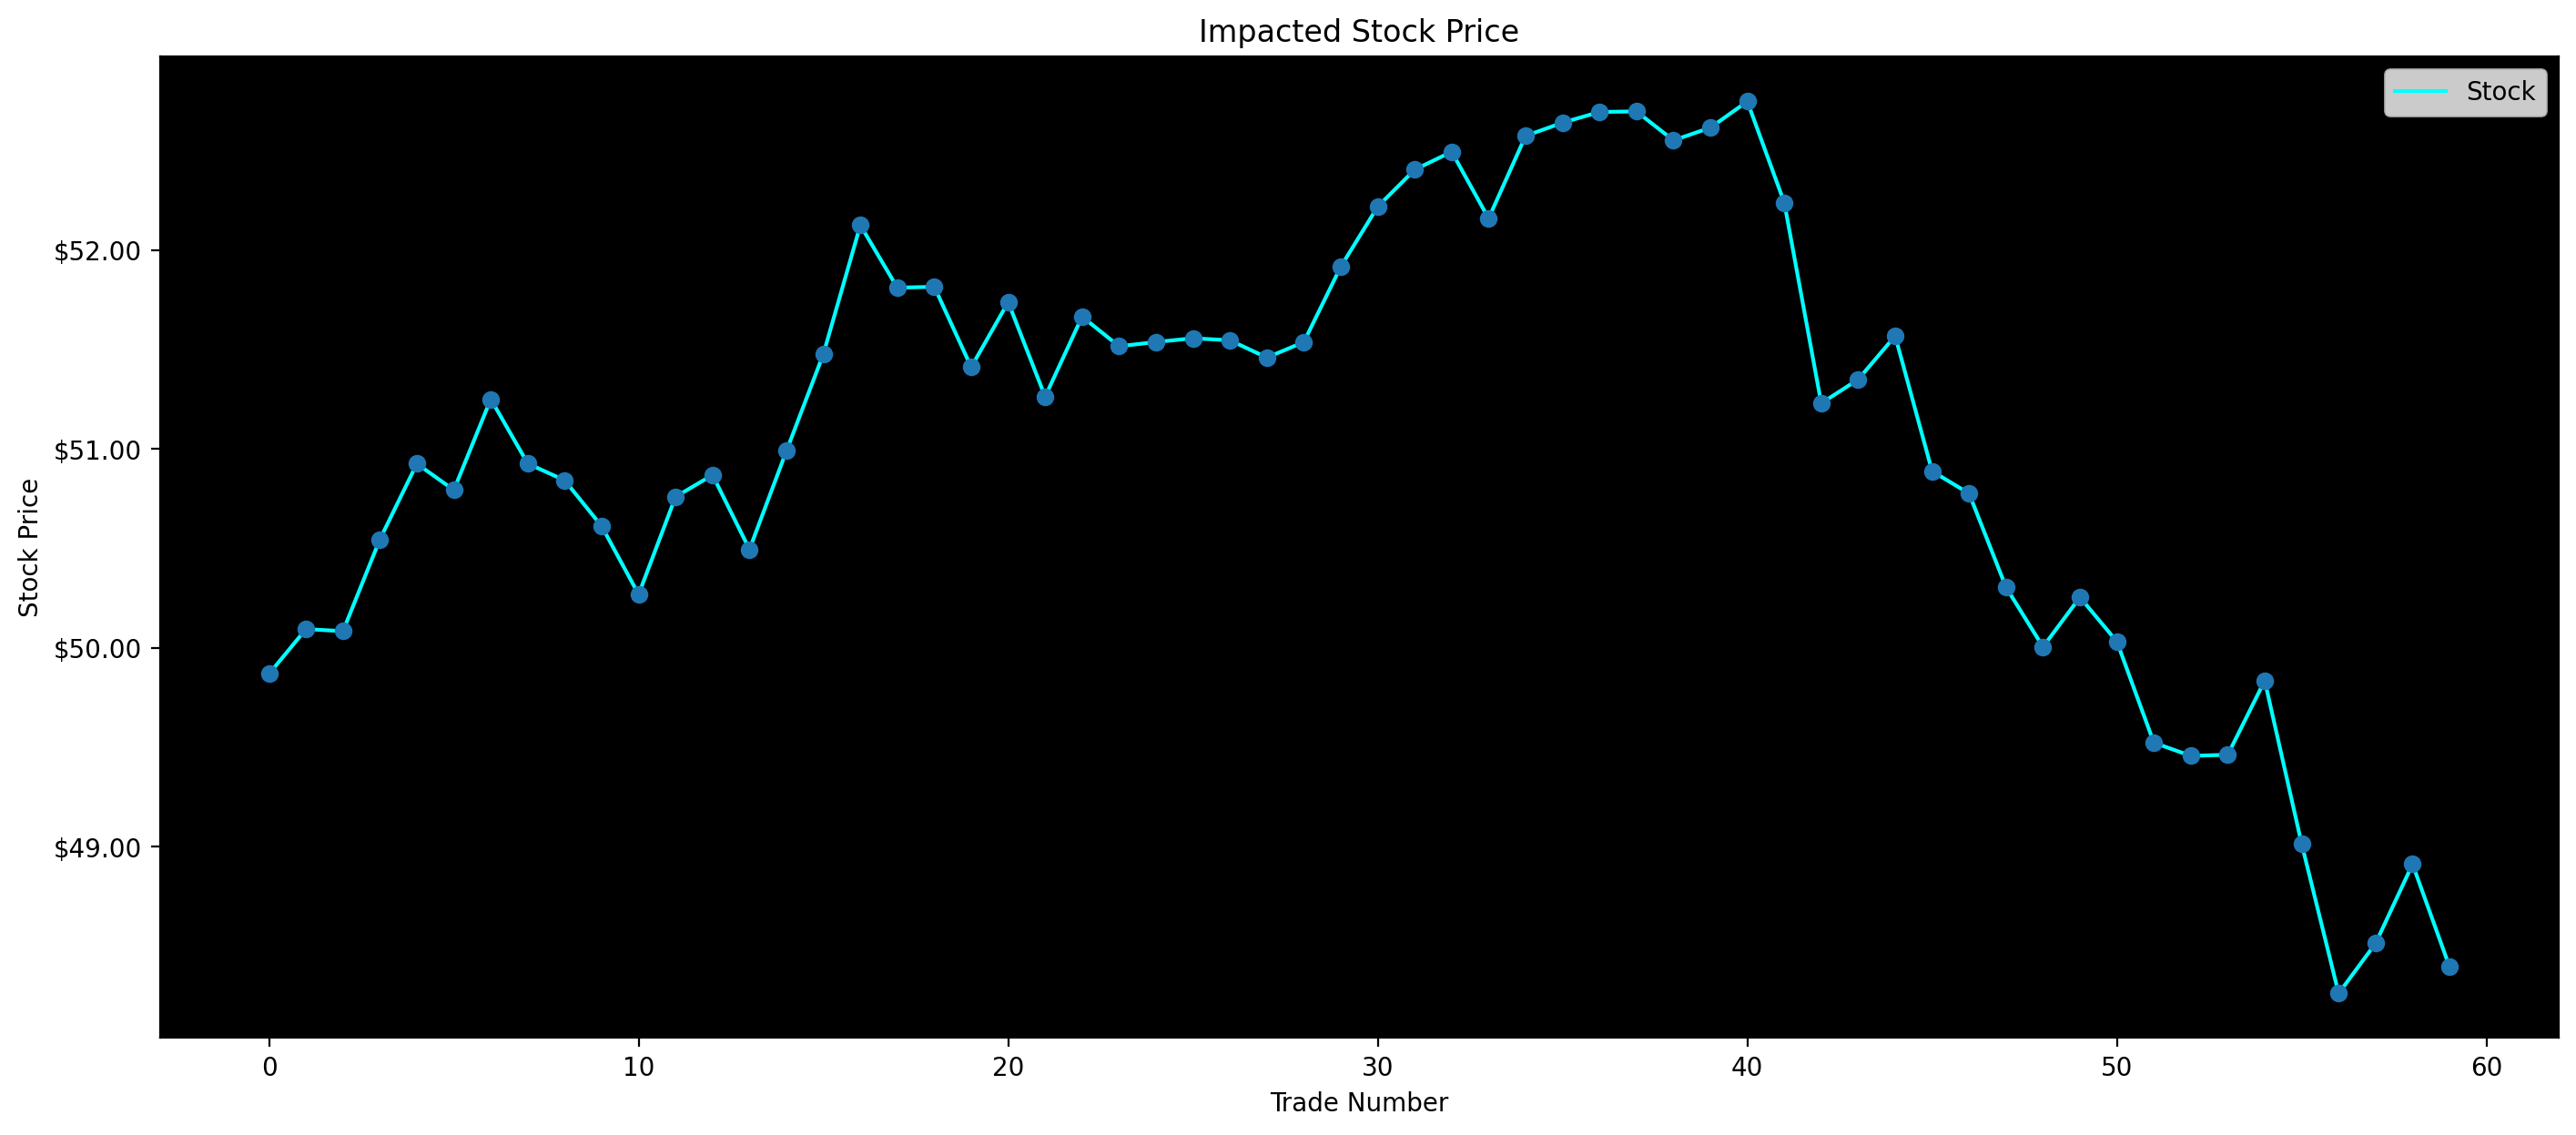

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# We set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]


# Set the random seed
sd = 1

# Set the number of days to sell all shares (i.e. the liquidation time)
l_time = 60

# Set the number of trades
n_trades = 60

# Set the trader's risk aversion
t_risk = 1e-8

# Implement the trading list for the given parameters
utils.implement_trade_list(seed = sd, lq_time = l_time, nm_trades = n_trades, tr_risk = t_risk)

Try diferent random seeds to see that the implementation shortfall is a random variable. 